# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
print(f"Train data shape: {data_train.shape}")
print(f"Test data shape: {data_test.shape}")

Train data shape: (40000, 41)
Test data shape: (10000, 41)


<IPython.core.display.Javascript object>

* There are 40000 rows and 41 columns in the train data.
* There are 10000 rows and 41 columns in the test data.

In [4]:
# let's view a sample of the train data
data_train.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
27689,-0.783,-0.158,6.358,0.232,-1.476,-3.733,-0.415,1.618,-0.867,0.427,-2.974,5.166,3.764,-0.875,-1.874,-1.056,-0.403,-1.347,3.924,2.571,-4.369,-0.839,-2.626,-1.644,1.042,2.406,0.705,-1.700,-1.580,-1.330,1.765,-2.734,-3.119,3.004,2.943,4.436,0.534,-3.213,2.454,-1.829,0
26491,-0.938,-0.342,1.246,-4.046,-1.629,2.242,-0.738,-5.189,2.107,-1.373,1.537,1.782,3.843,-1.996,-4.094,-6.229,-2.380,3.880,-0.885,0.178,-3.401,0.924,-3.077,-6.195,0.620,0.340,3.400,-1.299,1.369,-0.177,-6.065,-11.134,-0.426,0.863,-2.116,1.650,2.948,3.384,3.743,0.632,0
10325,-2.413,-0.418,1.600,6.176,-0.675,-2.842,-2.977,0.802,2.136,-1.301,-3.575,-1.425,1.759,-0.374,-5.027,-3.798,3.684,-0.185,2.949,5.578,-4.561,0.767,0.459,2.556,-0.926,0.547,-6.059,0.775,-0.656,2.881,-2.570,4.906,0.587,0.063,4.748,-2.758,-0.465,-3.983,-1.149,-4.406,0
13843,-2.208,1.043,4.574,1.939,0.868,0.162,-2.674,-5.710,1.446,2.618,-3.037,-3.385,2.327,-1.237,-5.504,-7.822,-3.297,1.655,2.231,-1.750,-5.464,0.340,-4.643,2.827,-0.806,4.888,0.087,-0.940,-3.079,-1.805,1.442,2.436,3.062,-0.288,3.532,2.187,-2.458,2.862,2.555,-5.044,0
18632,-3.282,-0.547,-0.320,-3.154,3.691,-0.057,-4.173,0.307,-0.186,-1.597,-3.456,0.911,6.101,0.234,-10.788,-3.914,-2.219,7.895,-6.266,-3.475,-7.067,4.052,7.242,5.791,-3.727,5.133,-5.936,-4.652,-1.351,4.113,3.608,12.377,6.989,-9.803,4.009,3.527,0.578,-4.227,0.296,0.289,0
27858,-1.096,2.298,1.922,4.782,1.030,-1.484,-1.531,-2.551,3.889,-1.192,-4.899,-3.720,1.243,-0.315,-3.309,-5.342,3.170,0.005,0.182,3.394,-2.367,0.031,-1.895,0.079,1.011,3.008,-2.139,0.704,-3.762,-3.765,-1.920,-0.247,-2.819,0.242,-1.167,-0.895,-0.362,-0.770,0.674,-2.727,0
17400,0.877,-4.105,9.239,-1.897,-3.863,-3.612,-2.150,-0.352,-0.118,3.525,-3.076,2.835,7.064,0.824,-4.022,-4.052,-5.282,-0.823,4.326,3.260,-8.048,-0.253,-5.820,-4.471,2.384,1.064,5.968,-3.272,-3.294,-1.911,3.644,-3.710,-2.769,3.586,5.984,8.023,-0.572,-5.991,3.909,-4.271,0
29785,-1.258,1.597,-1.581,-1.448,1.807,-1.965,-0.628,4.246,-0.010,-5.044,-1.703,5.789,4.244,-0.685,-5.102,0.970,2.967,3.346,-3.802,0.341,-3.221,2.498,7.980,1.153,-1.973,2.806,-6.045,-2.633,0.759,3.258,-1.010,4.020,0.333,-5.274,0.217,-0.163,2.970,-4.621,-0.880,2.882,0
4712,-2.634,5.853,1.985,1.124,1.515,2.281,0.954,-4.489,-0.626,-1.085,4.282,0.913,-0.955,-4.737,-0.571,-1.475,-2.568,-1.235,2.812,-6.212,-0.025,-2.623,-4.681,1.100,-3.195,6.750,-2.774,-0.666,4.700,2.016,-1.237,-2.636,6.508,0.017,0.916,-3.527,-1.392,8.825,1.127,-0.746,0
4715,-2.139,1.642,1.889,5.183,0.442,-1.808,-1.566,-1.574,2.819,-1.152,-4.229,-2.078,0.632,-0.789,-3.018,-4.473,3.753,-0.226,1.816,4.199,-2.198,-0.189,-1.744,0.769,0.443,1.879,-3.340,1.234,-2.330,-1.811,-2.739,-0.126,-2.180,1.329,0.053,-1.352,-0.026,-0.552,0.539,-3.027,0


<IPython.core.display.Javascript object>

In [5]:
# let's view a sample of the test data
data_test.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
5789,-0.670,-2.824,-2.083,-4.532,-0.959,2.950,-0.284,-1.906,-1.020,1.211,4.000,0.320,1.005,0.323,-0.913,0.032,-4.265,2.542,-1.637,-2.337,0.552,0.587,0.039,-2.082,-1.017,-2.517,2.945,-0.771,2.482,2.653,-1.485,-2.234,3.285,-0.465,-0.326,1.129,0.902,2.212,1.189,0.806,0
3073,6.472,-4.590,-1.155,0.738,-1.449,-2.953,-1.888,5.946,2.585,-2.175,-7.465,-3.681,-2.548,3.854,2.081,-1.074,8.848,2.366,-4.579,9.190,-1.955,4.055,5.034,0.430,5.715,-7.307,-0.543,1.314,-4.030,-1.554,1.679,2.662,-7.756,-3.886,0.664,0.698,1.586,-12.543,-4.606,4.352,1
7167,-2.095,4.013,-0.566,1.408,1.400,-1.104,0.279,1.496,-0.204,-4.018,0.656,4.917,1.989,-2.764,-3.351,0.089,2.106,0.517,0.614,-1.394,-2.257,0.673,3.835,2.035,-2.965,4.365,-6.310,-1.081,2.485,3.556,-2.610,2.039,2.280,-2.220,1.247,-3.278,1.194,1.043,-0.627,0.396,0
2951,-8.056,-6.118,3.494,9.765,-2.778,-5.975,-6.711,3.261,2.843,-0.617,-6.398,-1.646,5.817,1.672,-10.340,-3.835,4.934,-0.101,5.010,14.497,-6.498,-0.488,-0.421,0.700,-1.458,-3.014,-9.307,0.967,-0.780,6.183,-4.739,7.424,0.095,3.301,7.757,-0.626,0.870,-11.476,0.121,-9.124,0
5198,4.189,2.191,6.825,4.040,-1.041,-3.772,-2.246,-0.855,3.588,-1.493,-7.480,-1.598,1.504,-1.458,-3.218,-8.989,4.252,0.267,2.650,4.107,-9.326,2.531,-2.456,1.686,3.310,3.750,-1.439,-0.680,-4.437,-2.947,1.228,-0.127,-3.972,-1.702,5.483,0.183,-1.282,-4.747,-0.881,-1.822,0
6164,2.029,2.596,-0.729,-5.049,0.265,3.132,1.700,-1.728,-0.342,-3.593,2.594,2.908,-3.031,-3.314,2.830,-1.255,1.989,3.337,-2.806,-2.702,1.051,0.522,-0.864,-2.669,1.266,-0.003,0.735,-0.299,4.485,0.623,-2.883,-10.045,0.175,-2.159,-3.477,-0.864,2.965,4.682,0.213,7.108,0
2747,4.201,0.984,7.765,-2.751,-1.621,-1.494,0.085,-2.195,-0.635,2.581,-1.882,2.452,2.845,-1.397,-0.615,-4.907,-4.568,-0.577,3.488,-3.121,-7.042,0.891,-4.804,-0.579,2.153,4.337,5.712,-2.773,-2.930,-3.412,5.033,-3.273,-1.275,0.539,4.860,5.089,-1.973,0.153,2.242,-1.257,0
3898,-0.021,2.747,2.132,0.012,0.889,-3.172,0.971,2.641,-1.782,-1.370,-3.884,7.624,0.934,-1.887,-1.079,-1.238,3.161,0.918,2.683,-0.215,-3.642,2.225,3.768,3.896,-0.049,2.835,-2.504,-0.343,-2.462,-1.103,0.423,0.969,-3.586,0.241,1.402,1.960,1.227,0.193,0.756,0.499,0
3798,1.965,2.397,1.938,-3.704,1.664,-2.432,-0.200,3.845,-0.324,-4.835,-4.393,6.780,2.932,-1.526,-3.105,-1.456,3.895,4.410,-3.927,-0.208,-5.303,3.283,5.883,1.125,0.873,3.694,-3.357,-3.266,-0.928,0.031,1.884,0.263,-2.501,-5.901,0.470,3.016,3.088,-4.907,-0.328,5.532,0
5716,-5.884,0.457,5.685,4.616,1.449,-4.324,-2.837,-0.215,-0.710,2.359,-6.618,2.357,4.318,-0.522,-7.078,-4.124,-0.363,0.300,4.882,1.925,-5.793,-0.026,-0.806,5.650,-1.967,5.218,-4.256,-0.851,-4.975,-1.170,2.619,7.772,0.235,1.966,4.852,4.437,-1.449,-1.488,3.025,-7.019,0


<IPython.core.display.Javascript object>

In [6]:
# let's check the data types of the columns in the train dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

* All the 40 features are of float type and the target variable is of type int64.
* There are a total of 41 columns and 40000 observations in the dataset.
* The columns V1 and V2 have less than 40000 non-null values i.e. these columns have missing values. 

In [7]:
# let's check the data types of the columns in the test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

* All the 40 features are of float type and the target variable is of type int64.
* There are a total of 41 columns and 10000 observations in the dataset.
* The columns V1 and V2 have less than 10000 non-null values i.e. these columns have missing values.

In [8]:
# let's check for duplicate values in the train and test data
print(f"Duplicated values in the train data:{data_train.duplicated().sum()}")
print(f"Duplicated values in the test data:{data_test.duplicated().sum()}")

Duplicated values in the train data:0
Duplicated values in the test data:0


<IPython.core.display.Javascript object>

* There are no duplicate values in the train and test data.

In [9]:
# let's view the statistical summary of the numerical columns in the data
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

* The mean and median values of all features V1 to V40 indicates that almost all the features have a normal distribution. Will explore further in the EDA.
* The mean value of the Target variable indicates that there are very less count of 1 values.

In [10]:
# let's check for missing values in the train data
data_train.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* There are few missing values in the columns V1 and V2 in the train dataset.

In [11]:
# let's check for missing values in the test data
data_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* There are few missing values in the columns V1 and V2 in the test dataset.

In [12]:
# Let's check the count of each unique category in the target variable for train and test data.
print(
    f"Unique value counts for Train data:\n {data_train['Target'].value_counts(normalize = True)}\n"
)
print("=" * 50)
print(
    f"Unique value counts for Test data:\n {data_test['Target'].value_counts(normalize = True)}"
)

Unique value counts for Train data:
 0   0.945
1   0.055
Name: Target, dtype: float64

Unique value counts for Test data:
 0   0.945
1   0.055
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

* The class distribution of target variable is the same for the train and test data with 94.5% of 0 values and 5.5% of 1 values.

## EDA

### Univariate Analysis

### Plotting histograms and boxplots for all the variables

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

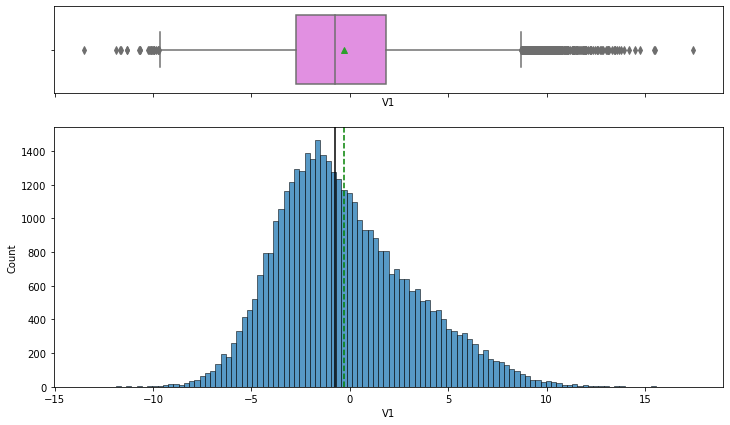

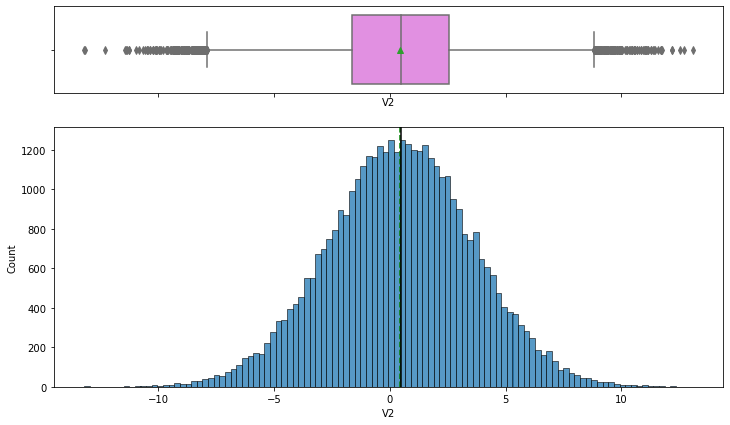

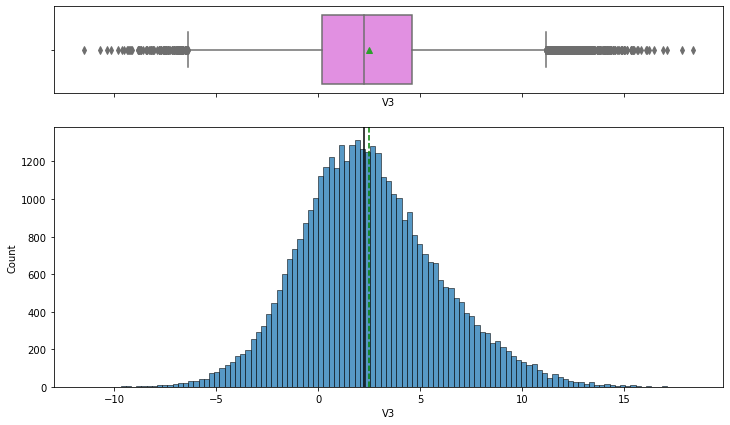

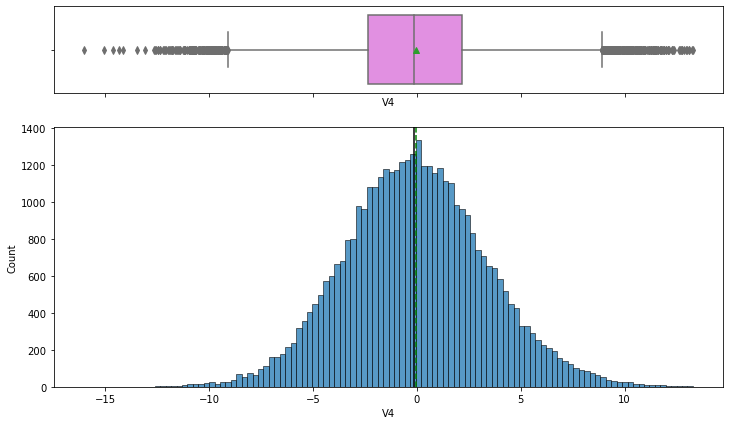

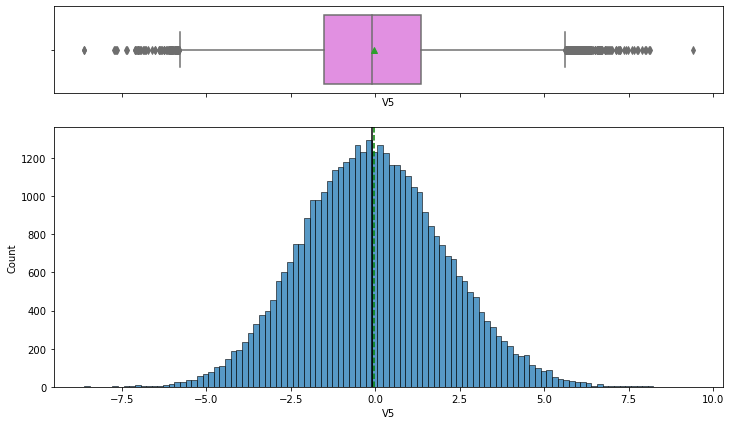

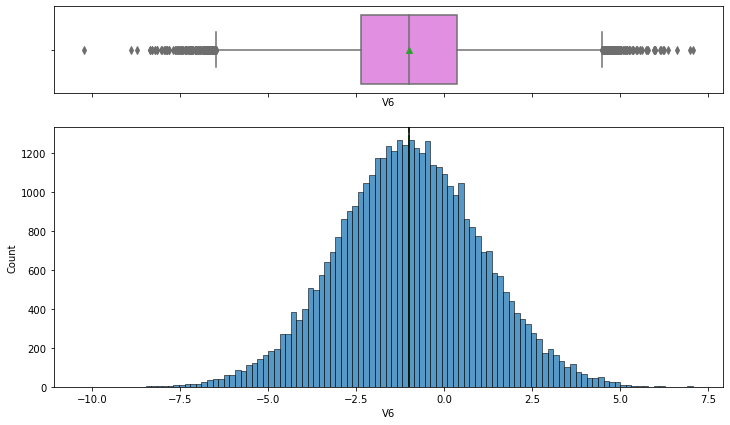

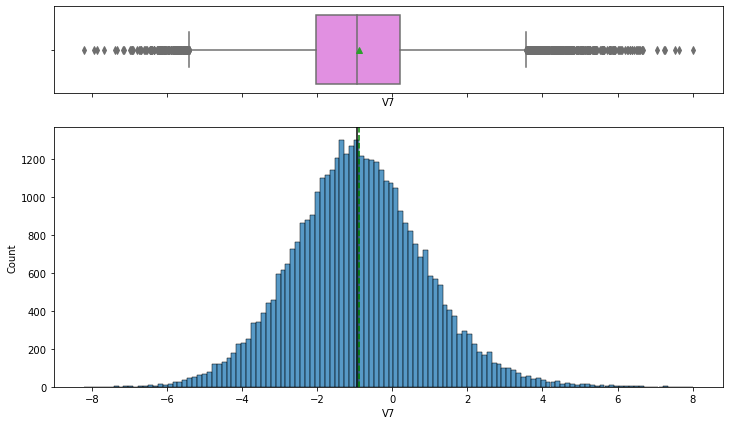

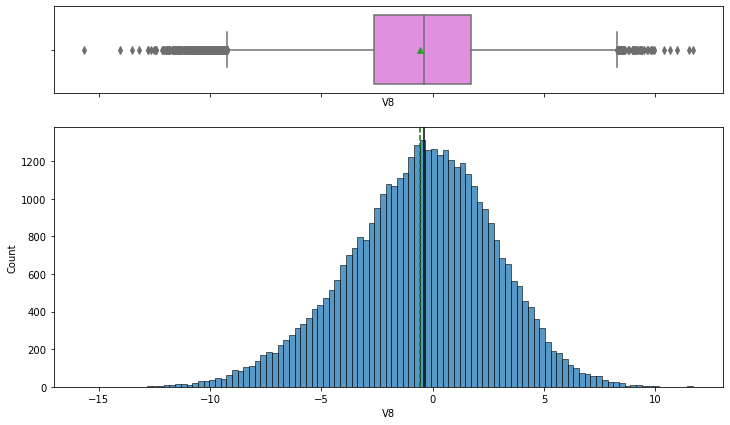

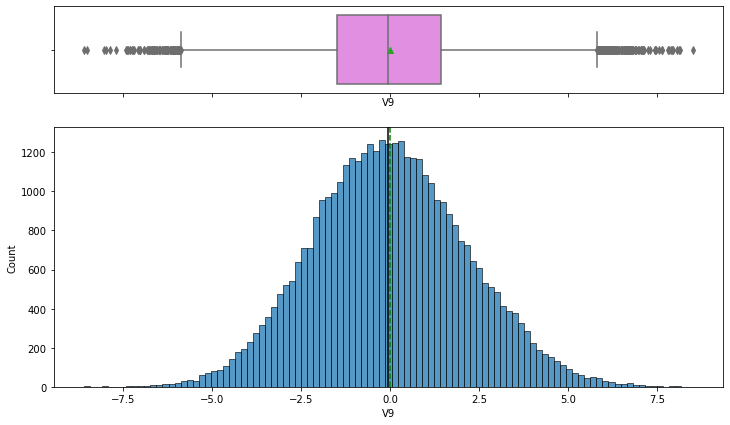

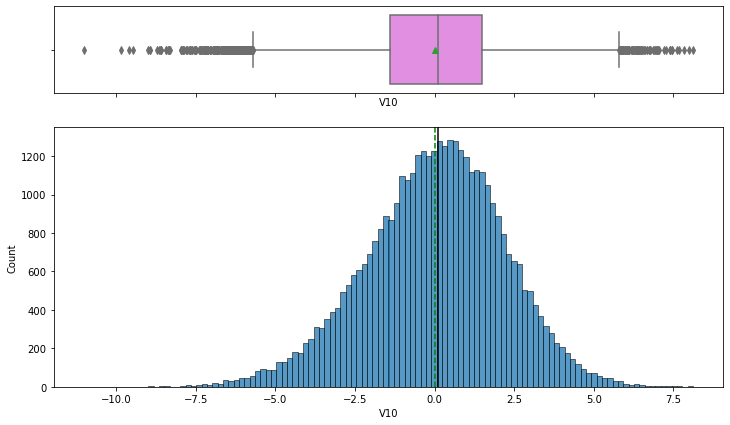

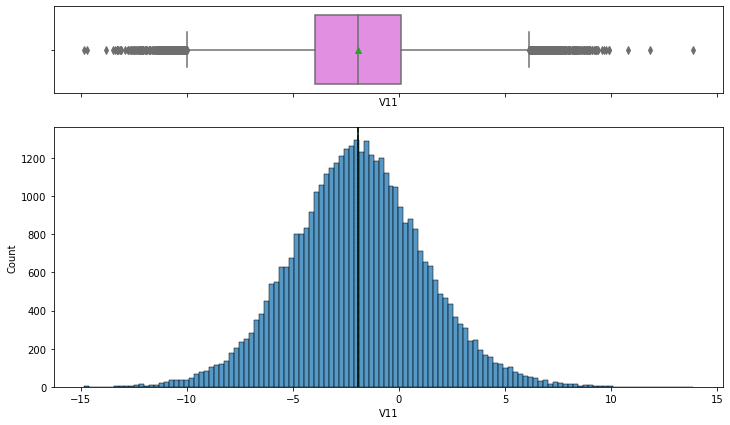

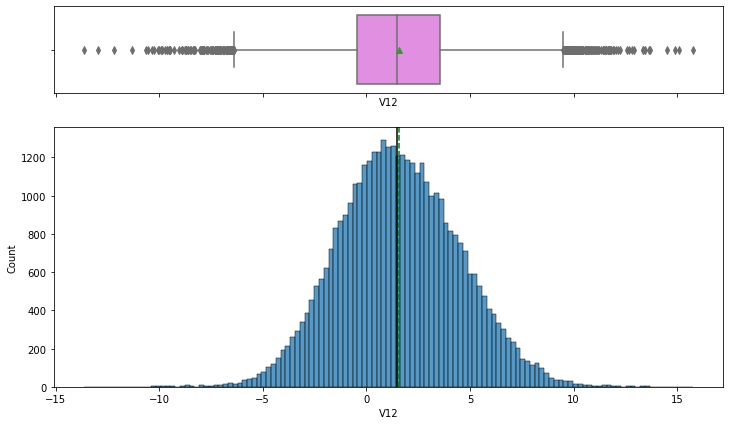

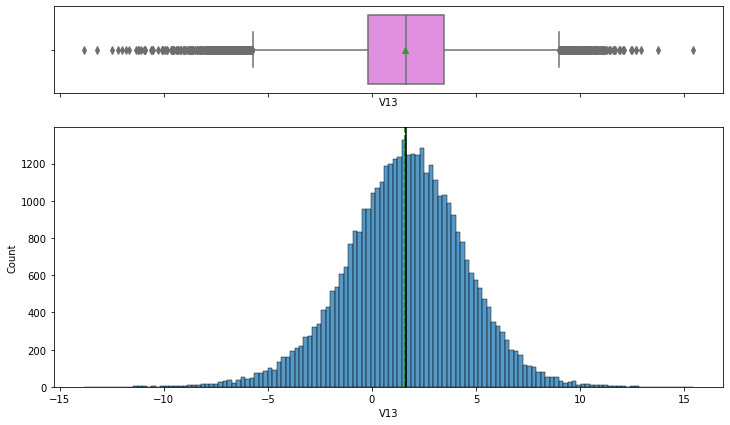

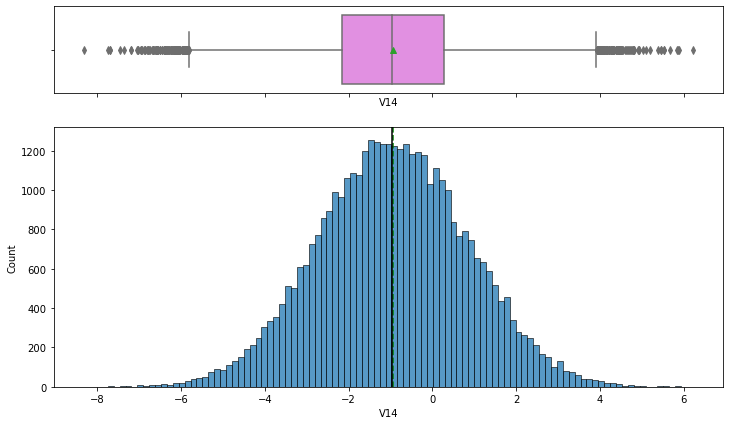

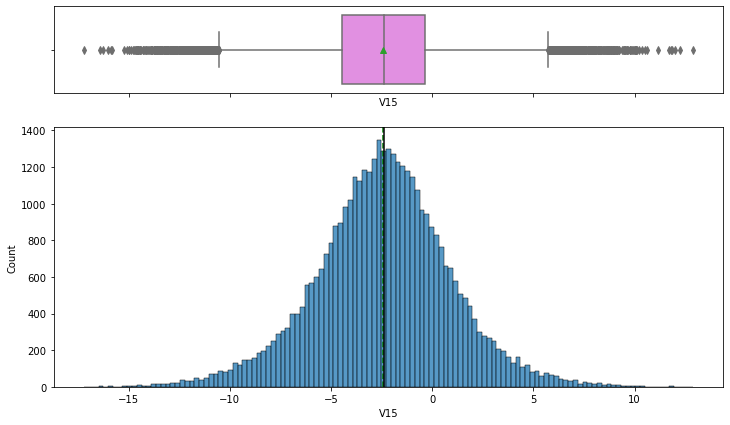

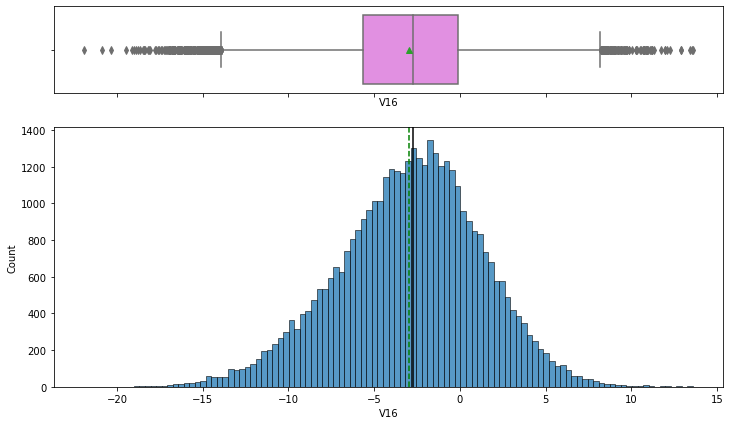

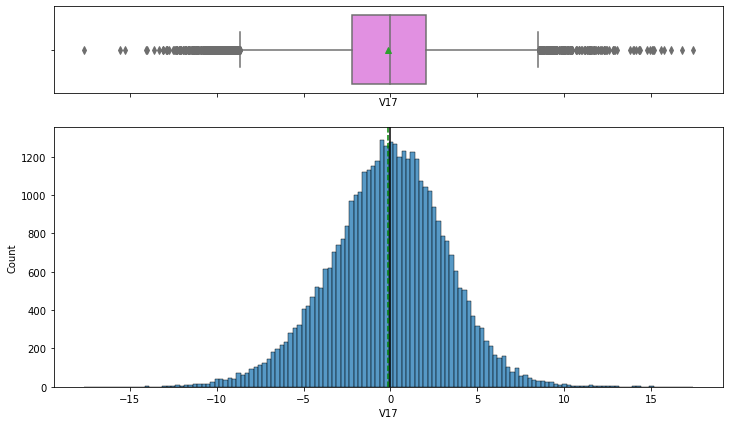

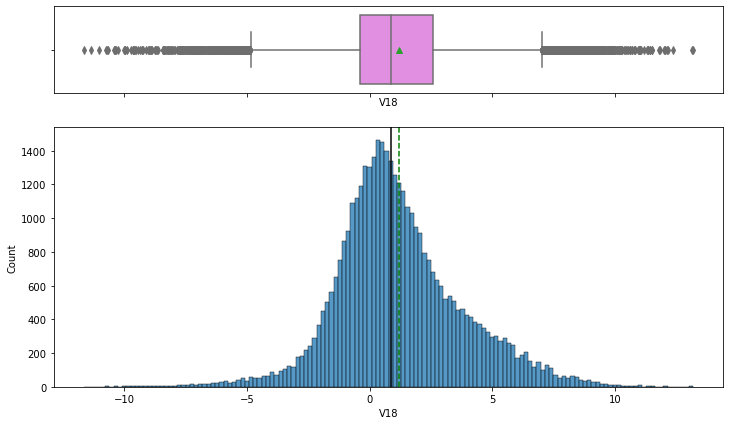

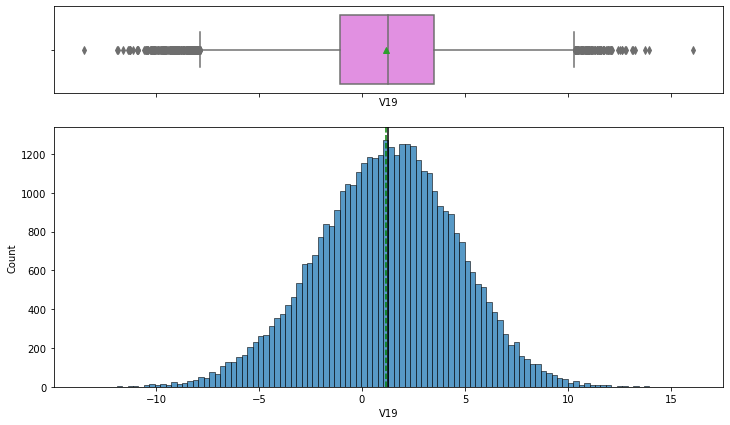

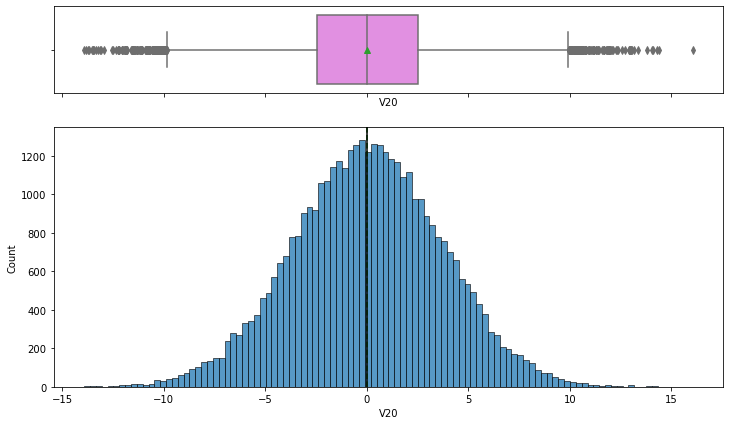

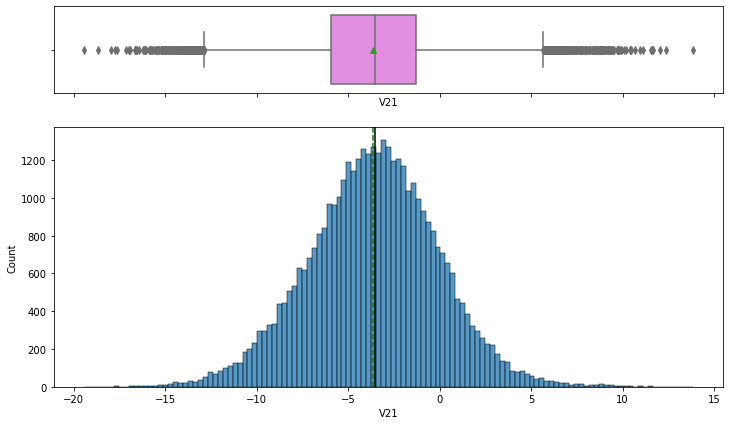

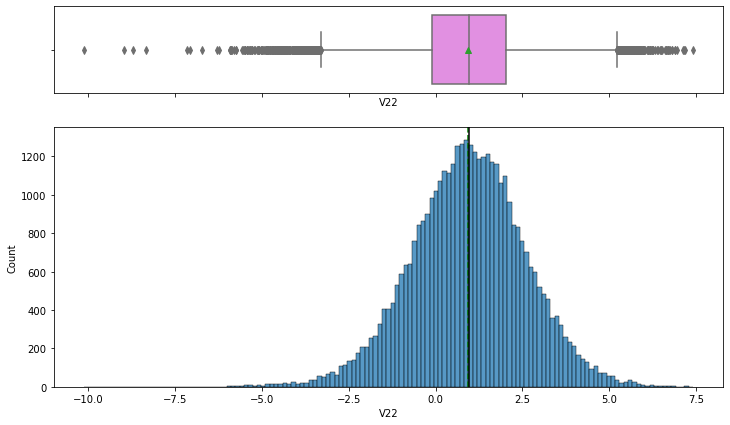

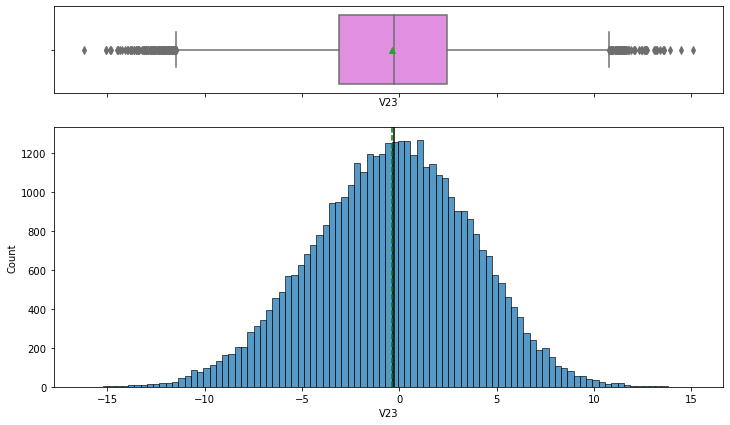

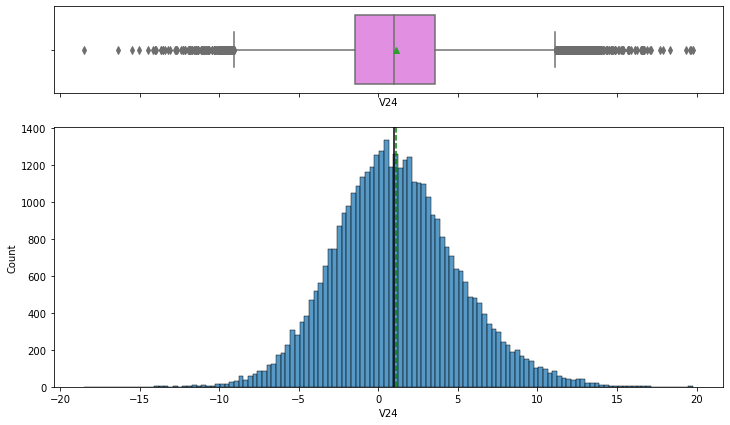

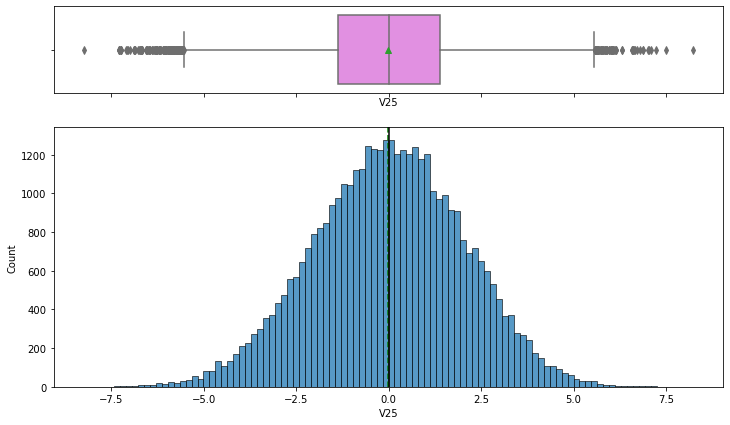

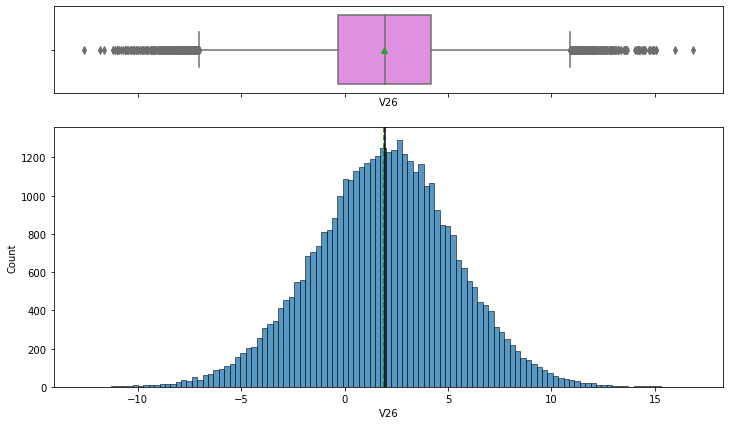

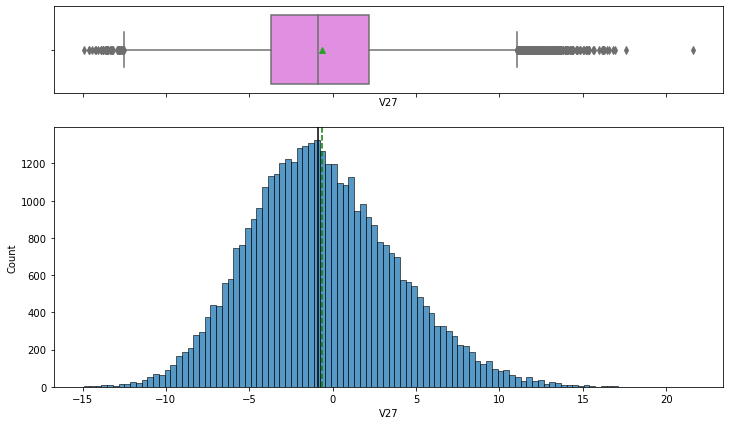

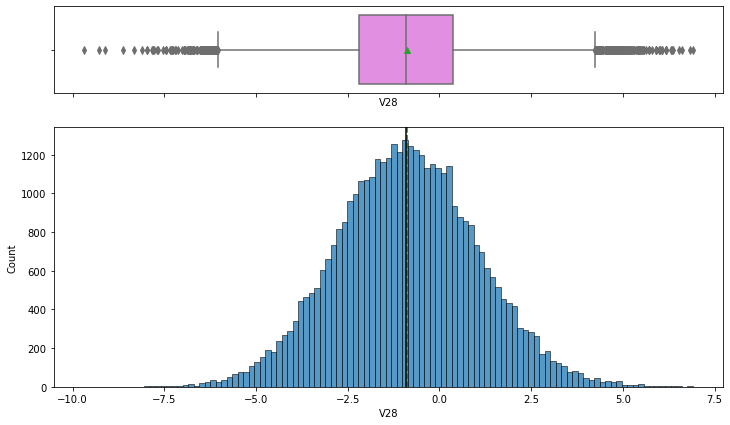

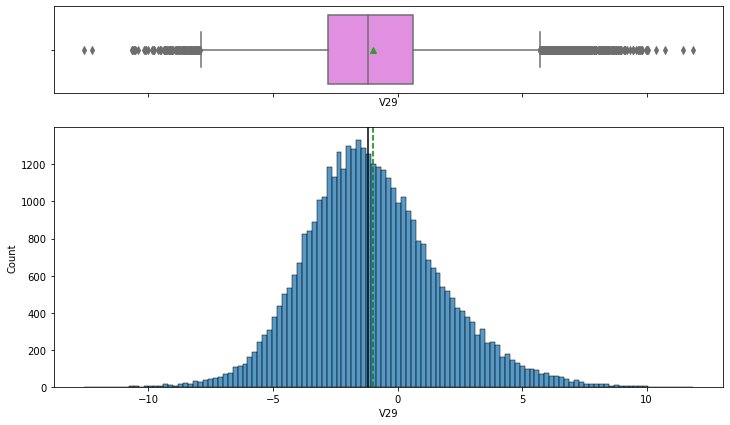

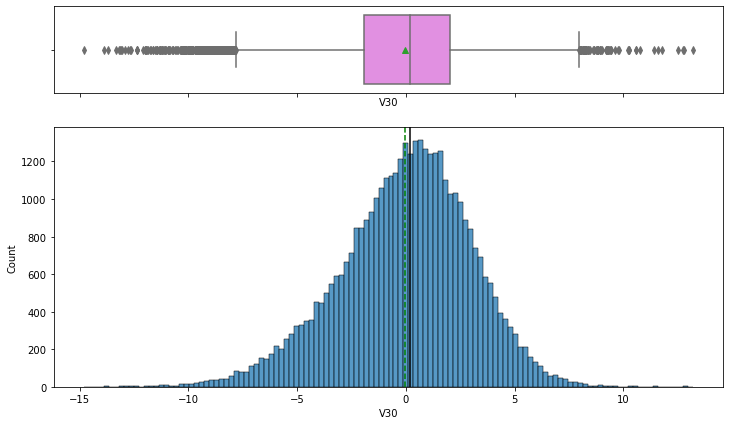

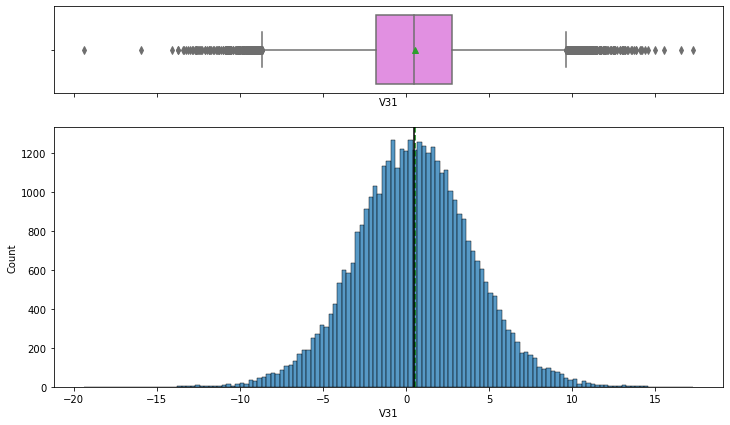

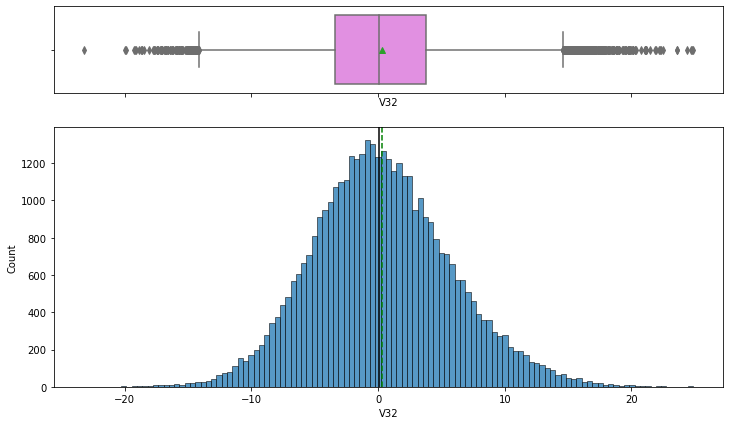

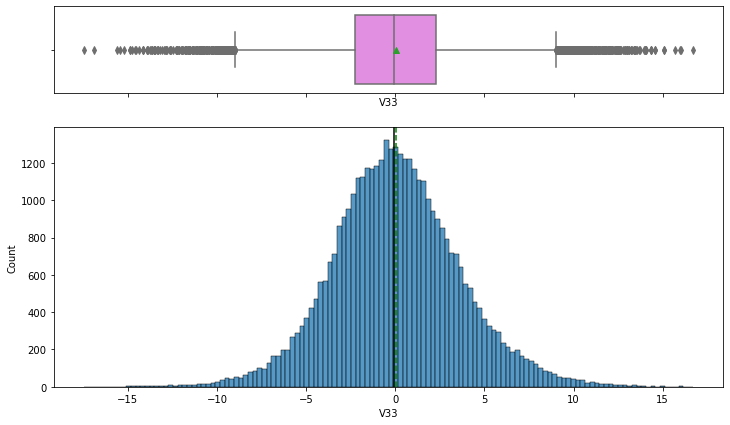

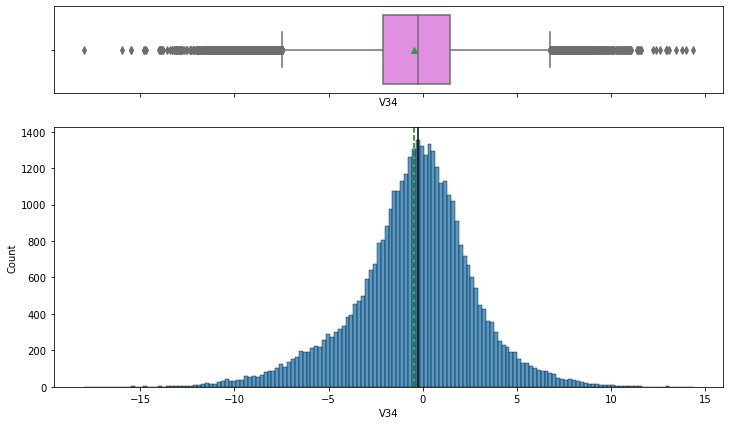

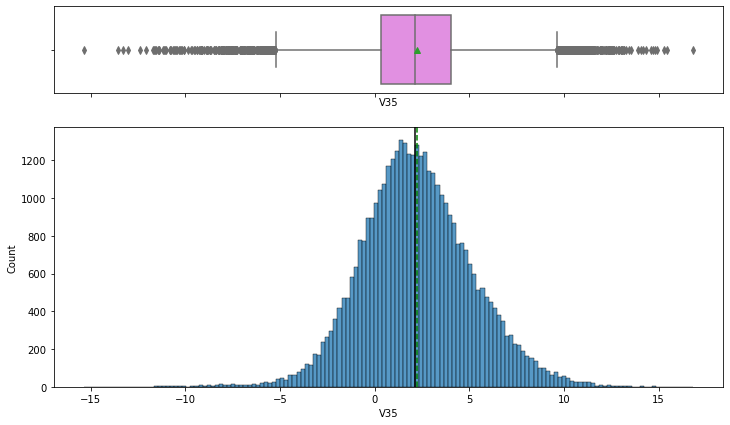

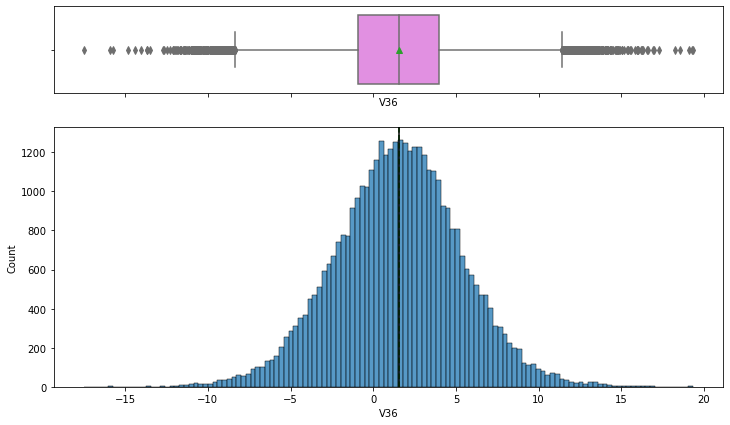

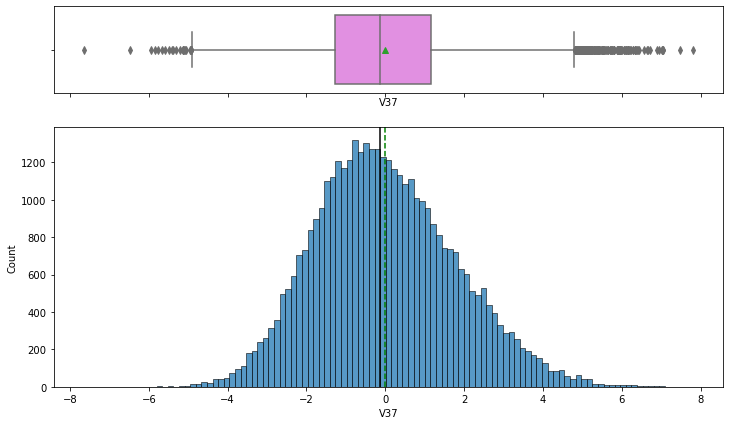

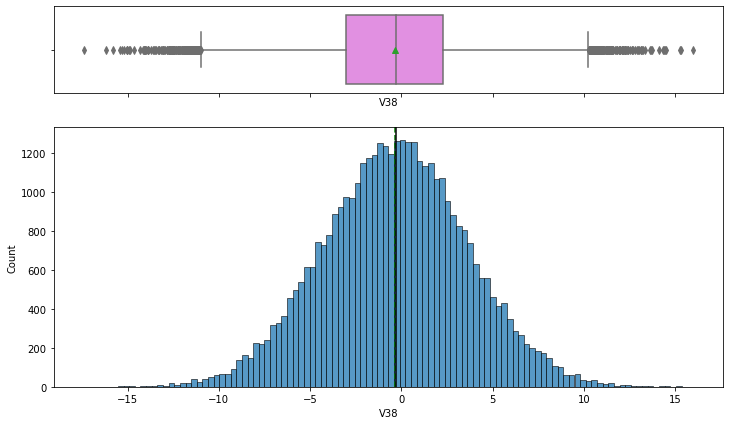

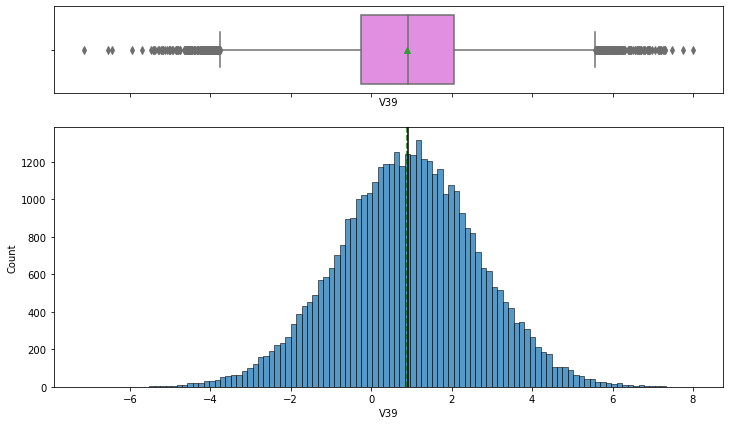

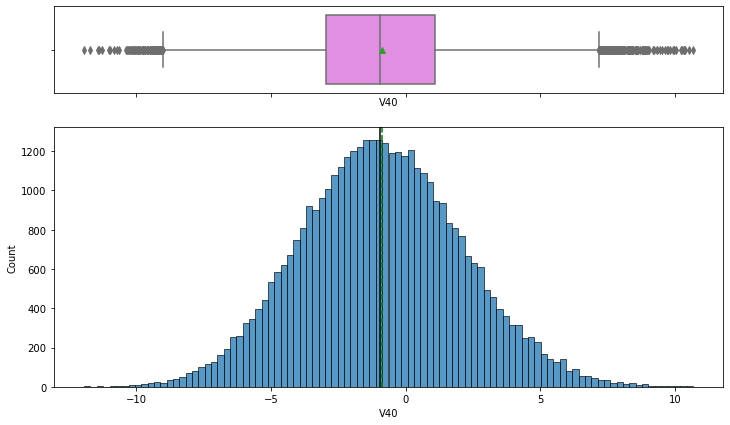

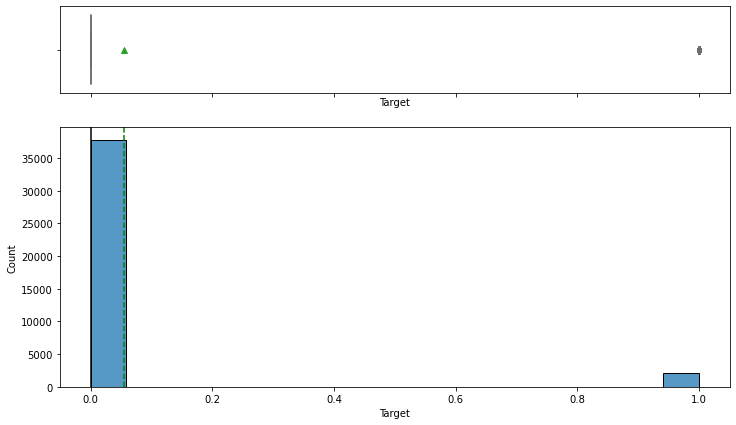

<IPython.core.display.Javascript object>

In [14]:
for feature in data_train.columns:
    histogram_boxplot(data_train, feature, figsize=(12, 7), kde=False, bins=None)

* There are outliers in all the features from V1 to V40. But, these values are valid and hence, we will proceed without outlier treatment for these features.
* The distribution is almost normal for all the featues from V1 to V40.
* The Target column has more than 35000 '0' values and less then 5000 '1' values.

### Bivariate Analysis

### Plotting the target variable vs all features

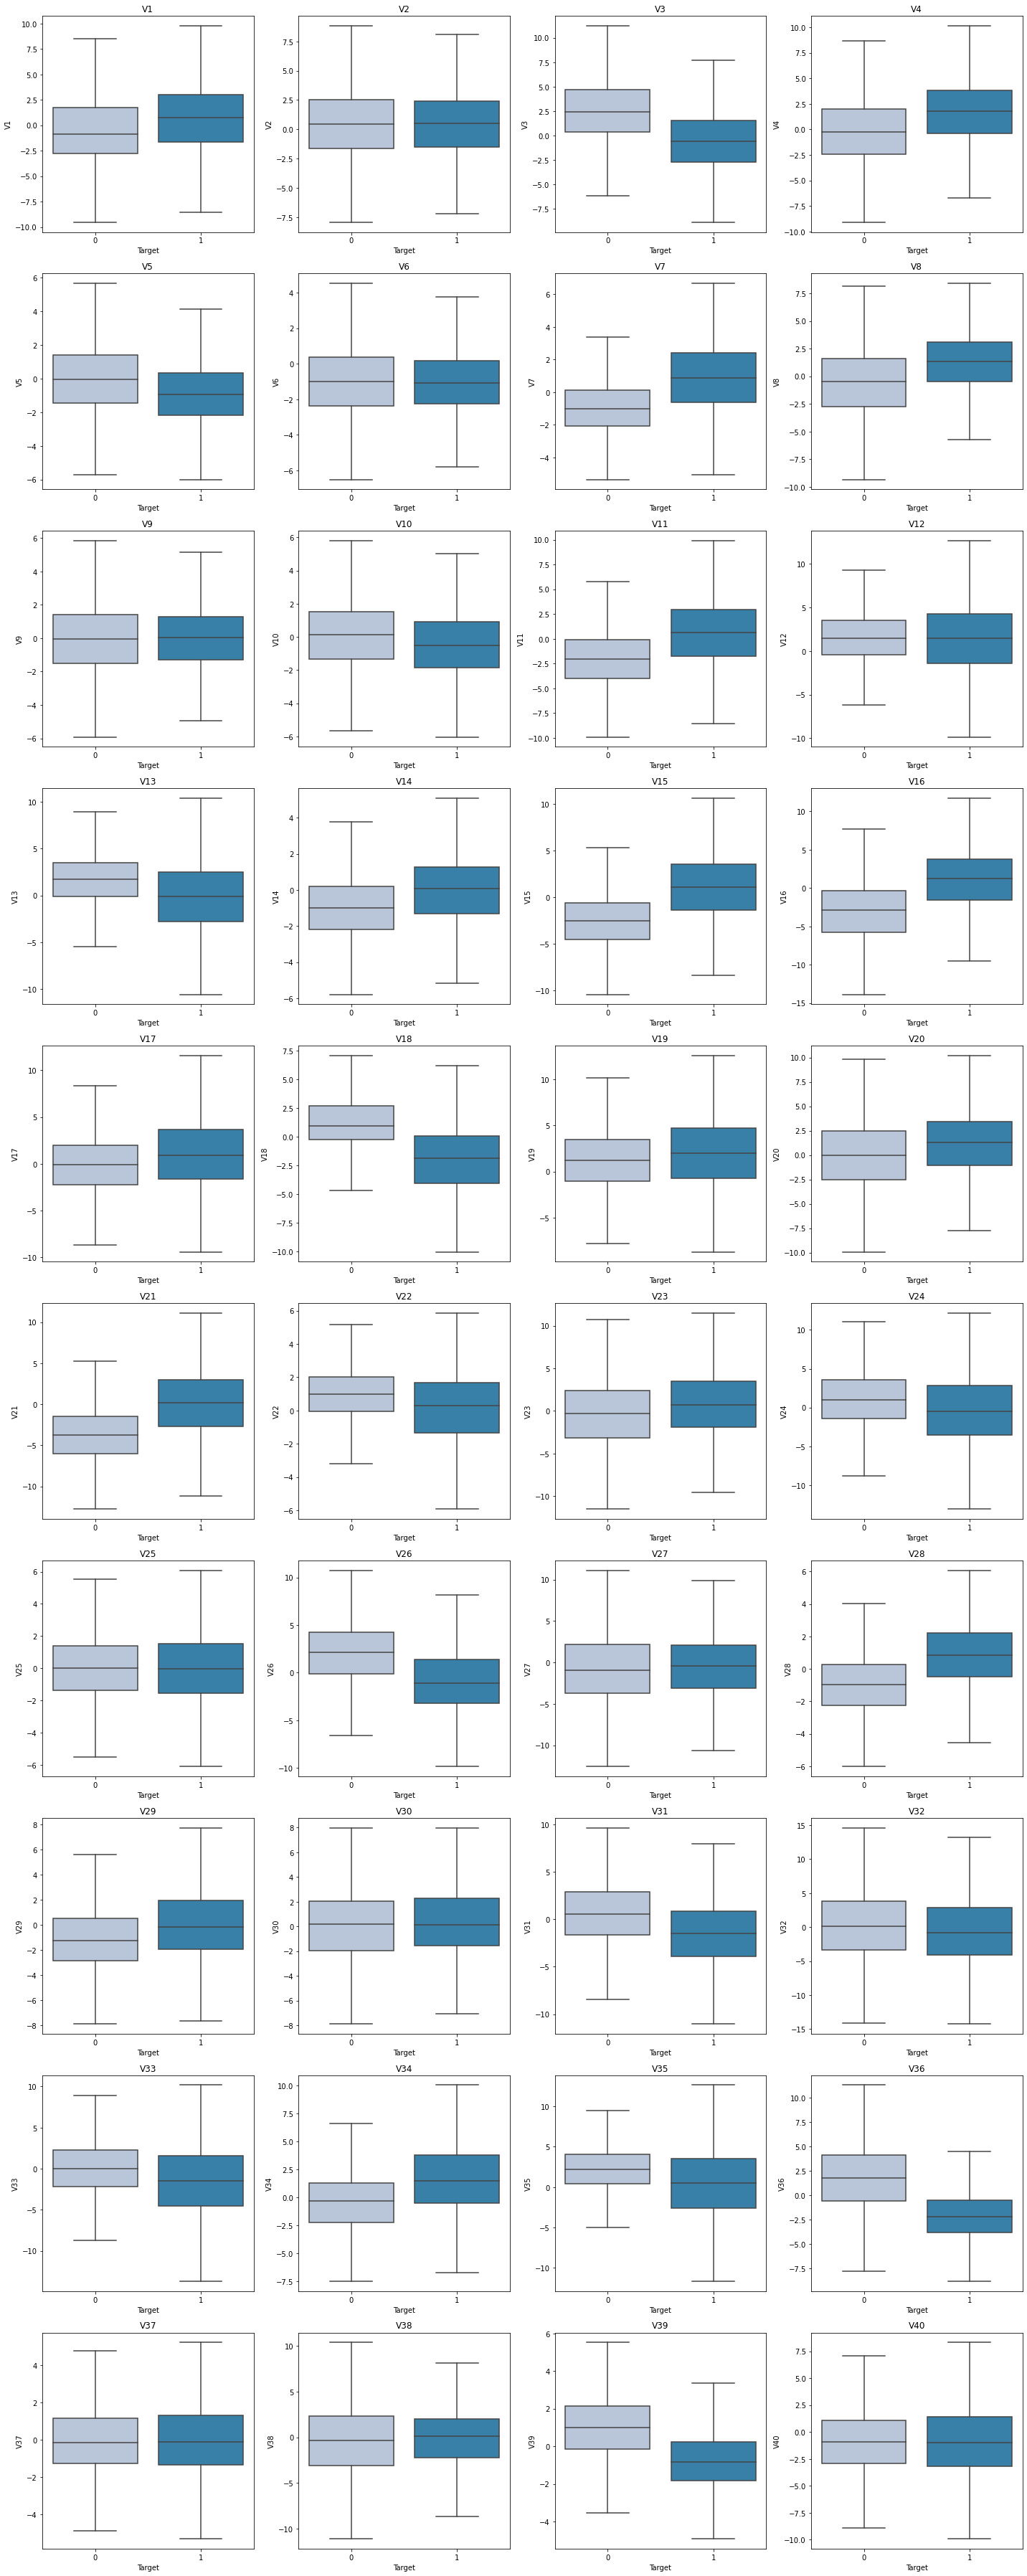

<IPython.core.display.Javascript object>

In [15]:
cols = data_train.columns.tolist()
cols.remove("Target")
plt.figure(figsize=(20, 50))

for i, variable in enumerate(cols):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(
        data_train["Target"], data_train[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The boxplots shows that the average value of these features <V1, V4, V7, V8, V11, V14, V15, V16, V17, V19, V20, V21, V28, V29, V34> are more during failure than during no failure.
* The boxplots shows that the average value of these features <V3, V5, V10, V13, V18, V22, V24, V26, V31, V32, V35, V36, V39> are less during failure than during no failure.

## Data Pre-processing

### Data preparation for modelling

In [16]:
# Separating target variable from train dataset
X = data_train.drop("Target", axis=1)
y = data_train["Target"]

# Separating target variable from test dataset
X_test = data_test.drop("Target", axis=1)
y_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [17]:
# Splitting the train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

## Missing Value Treatment
* We will use median to impute missing values in the columns V1 and V2.

In [18]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [20]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [21]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

In [22]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.7335365853658538
Logistic regression: 0.48292682926829267
Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853

Validation Performance:

dtree: 0.7477148080438757
Logistic regression: 0.4625228519195612
Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521


<IPython.core.display.Javascript object>

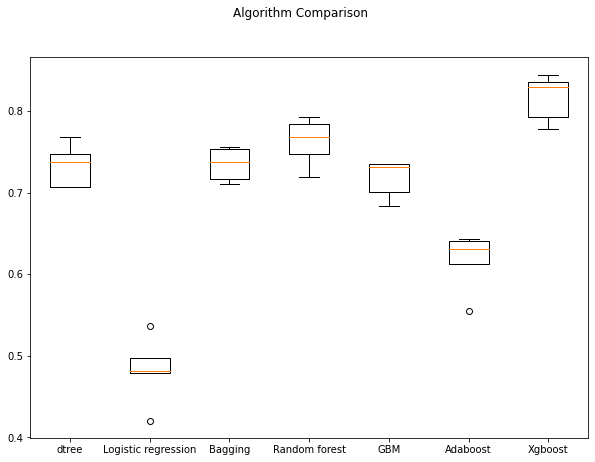

<IPython.core.display.Javascript object>

In [23]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* The cross-validated performance of Xgboost is very high when compared to other models. The validation performance is also good.
* Random forest has the next higher cross-validated score. The validation performance is also good.
* Decision Tree and Bagging Classifier have almost same score. The boxplot comparison shows the decision tree is giving a slightly higher value than the Bagging Clasifier.
* All the models have a generalized performance with the original data.
* The best 3 performing models using original data is Xgboost, Random Forest and Decision Tree.

### Model Building with Oversampled data


In [24]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

In [25]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("dtree_over", DecisionTreeClassifier(random_state=1)))
models_over.append(("Logistic regression_over", LogisticRegression(random_state=1)))
models_over.append(("Bagging_over", BaggingClassifier(random_state=1)))
models_over.append(("Random forest_over", RandomForestClassifier(random_state=1)))
models_over.append(("GBM_over", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost_over", AdaBoostClassifier(random_state=1)))
models_over.append(
    ("Xgboost_over", XGBClassifier(random_state=1, eval_metric="logloss"))
)

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result2 = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result2)
    names2.append(name)
    print("{}: {}".format(name, cv_result2.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree_over: 0.9722143864598026
Logistic regression_over: 0.8754583921015515
Bagging_over: 0.9730606488011284
Random forest_over: 0.9817348377997179
GBM_over: 0.9148095909732017
Adaboost_over: 0.8933004231311706
Xgboost_over: 0.9843794076163611

Validation Performance:

dtree_over: 0.8135283363802559
Logistic regression_over: 0.8391224862888482
Bagging_over: 0.8354661791590493
Random forest_over: 0.8683729433272395
GBM_over: 0.8811700182815356
Adaboost_over: 0.850091407678245
Xgboost_over: 0.8793418647166362


<IPython.core.display.Javascript object>

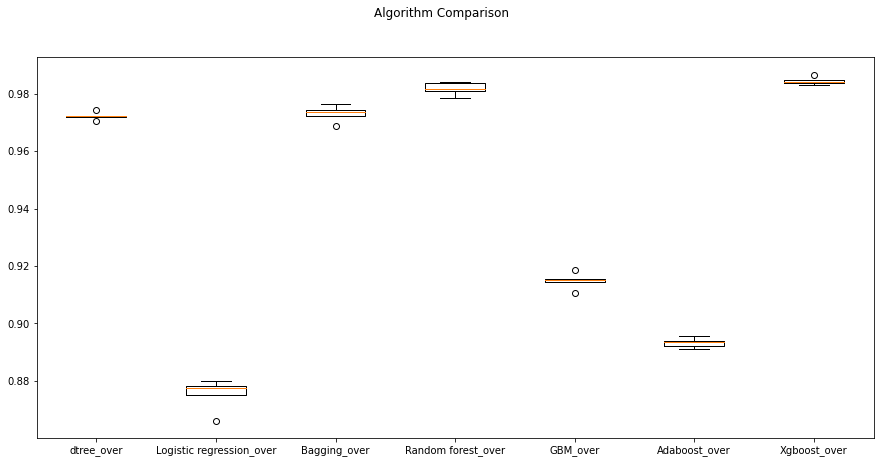

<IPython.core.display.Javascript object>

In [26]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show()

* XGBoost and Random Forest models are giving high cross-validated performace.
* XGBoost is giving a slightly higher performance than Random Forest. The validation performance is also good.
* Decision Tree and Bagging Classifier are not able to give a generalized performance on oversampled data.
* The next higher performance is given by Gradient Boosting model.
* The three best models using Oversampled data are Xgboost, Random Forest and Gradient Boosting.

### Model Building with Undersampled data

In [27]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [28]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

In [29]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("dtree_un", DecisionTreeClassifier(random_state=1)))
models_un.append(("Logistic regression_un", LogisticRegression(random_state=1)))
models_un.append(("Bagging_un", BaggingClassifier(random_state=1)))
models_un.append(("Random forest_un", RandomForestClassifier(random_state=1)))
models_un.append(("GBM_un", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost_un", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost_un", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result3 = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result3)
    names3.append(name)
    print("{}: {}".format(name, cv_result3.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree_un: 0.8591463414634146
Logistic regression_un: 0.8554878048780488
Bagging_un: 0.875
Random forest_un: 0.8981707317073171
GBM_un: 0.8878048780487804
Adaboost_un: 0.8725609756097562
Xgboost_un: 0.8939024390243903

Validation Performance:

dtree_un: 0.8537477148080439
Logistic regression_un: 0.8464351005484461
Bagging_un: 0.8628884826325411
Random forest_un: 0.8848263254113345
GBM_un: 0.8884826325411335
Adaboost_un: 0.8647166361974405
Xgboost_un: 0.9012797074954296


<IPython.core.display.Javascript object>

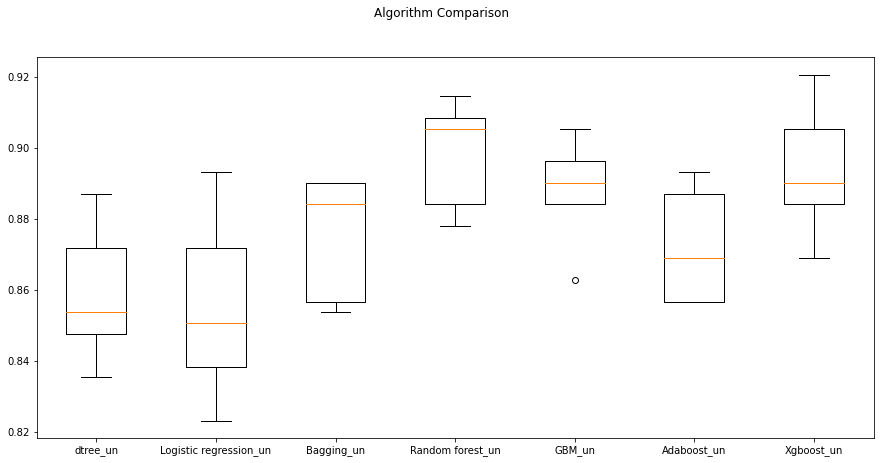

<IPython.core.display.Javascript object>

In [30]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names3)

plt.show()

* XGBoost and Random Forest models are giving high cross-validated performace with Undersampled data. 
* Random Forest has a slightly better cross-validated score when compared to Xgboost model. The validation performance is better for Xgboost model.
* The next higher performance is given by Gradient Boosting model.
* All the models are giving a generalized performance based on the undersampled data. The validation performance of all the models have increased with Undersampled data.
* The three best models using Undersampled data are Xgboost, Random Forest and Gradient Boosting.

## HyperparameterTuning 

* Xgboost, Random Forest and Gradient Boosting models are giving higher and similar performances with both Oversampled and Undersampled data. So we will tune these 6 models to see which model is able to give highest Recall value.
* We will use RandomizedSearchCV to tune the models as it will be faster.

### Tuning XGBoost using Oversampled data

In [31]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV
param_grid={ 
    'n_estimators': np.arange(50,150,50), 
    'scale_pos_weight': [5,10], 
    'learning_rate': [0.1,0.2], 
    'gamma': [0,3,5], 
    'subsample': [0.8,0.9] 
}

#Calling RandomizedSearchCV
xgb_over_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
xgb_over_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_over_tuned.best_params_,xgb_over_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9960507757404795:
Wall time: 59min 2s


<IPython.core.display.Javascript object>

In [32]:
# building model with best parameters
xgb_over_tuned2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    n_estimators=100,
    scale_pos_weight=10,
    learning_rate=0.2,
    gamma=3,
    subsample=0.9,
)
# Fit the model on oversampled data
xgb_over_tuned2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [33]:
# Calculating different metrics on train set
xgb_over_tuned_train_perf = model_performance_classification_sklearn(
    xgb_over_tuned2, X_train_over, y_train_over
)
print("Training performance - XGB Tuned:")
xgb_over_tuned_train_perf

Training performance - XGB Tuned:


,Accuracy,Recall,Precision,F1
0,0.990,1.000,0.980,0.990


<IPython.core.display.Javascript object>

In [34]:
# Calculating different metrics on validation set
xgb_over_tuned_val_perf = model_performance_classification_sklearn(
    xgb_over_tuned2, X_val, y_val
)
print("Validation performance - XGB Tuned:")
xgb_over_tuned_val_perf

Validation performance - XGB Tuned:


,Accuracy,Recall,Precision,F1
0,0.965,0.901,0.626,0.739


<IPython.core.display.Javascript object>

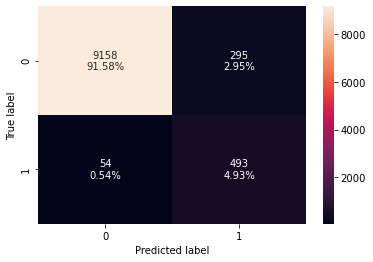

<IPython.core.display.Javascript object>

In [35]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_over_tuned2, X_val, y_val)

* The tuned Oversampled Xgboost model is able to give a generalized performance with a good Recall value of 0.90.

### Tuning XGBoost using Undersampled data

In [36]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV
param_grid={ 
    'n_estimators': np.arange(50,150,50), 
    'scale_pos_weight': [5,10], 
    'learning_rate': [0.1,0.2], 
    'gamma': [0,3,5], 
    'subsample': [0.8,0.9] 
}

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 50, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9292682926829269:
Wall time: 3min 20s


<IPython.core.display.Javascript object>

In [37]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    n_estimators=50,
    scale_pos_weight=10,
    learning_rate=0.1,
    gamma=5,
    subsample=0.9,
)
# Fit the model on oversampled data
xgb_tuned2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [38]:
# Calculating different metrics on train set
xgb_tuned_train_perf = model_performance_classification_sklearn(
    xgb_tuned2, X_train_un, y_train_un
)
print("Training performance - XGB Tuned:")
xgb_tuned_train_perf

Training performance - XGB Tuned:


,Accuracy,Recall,Precision,F1
0,0.947,1.000,0.905,0.950


<IPython.core.display.Javascript object>

In [39]:
# Calculating different metrics on validation set
xgb_tuned_val_perf = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance - XGB Tuned:")
xgb_tuned_val_perf

Validation performance - XGB Tuned:


,Accuracy,Recall,Precision,F1
0,0.811,0.929,0.216,0.350


<IPython.core.display.Javascript object>

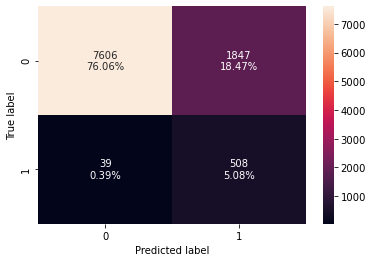

<IPython.core.display.Javascript object>

In [40]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

* The tuned undersampled Xgboost model is giving a generalized Recall value of 0.929.
* Accuracy, Precision and F1 score has come down very low.
* Recall value is greater than the Tuned Oversampled Xgboost model.

### Tuning Random Forest using Oversampled data

In [41]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": [200,250,300], 
    "min_samples_leaf": np.arange(1, 4), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) 
}

#Calling RandomizedSearchCV
rf_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
rf_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(rf_tuned.best_params_,rf_tuned.best_score_))


Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:
Wall time: 35min 40s


<IPython.core.display.Javascript object>

In [42]:
# building model with best parameters
rf_tuned2 = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)
# Fit the model on oversampled data
rf_tuned2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [43]:
# Calculating different metrics on train set
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned2, X_train_over, y_train_over
)
print("Training performance - Tuned RandomForest:")
rf_tuned_train_perf

Training performance - Tuned RandomForest:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [44]:
# Calculating different metrics on validation set
rf_tuned_val_perf = model_performance_classification_sklearn(rf_tuned2, X_val, y_val)
print("Validation performance - Tuned RandomForest:")
rf_tuned_val_perf

Validation performance - Tuned RandomForest:


,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

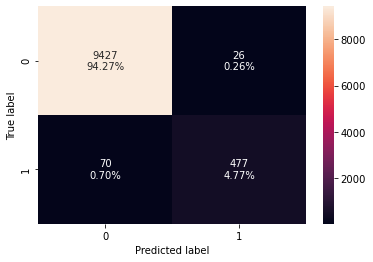

<IPython.core.display.Javascript object>

In [45]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned2, X_val, y_val)

* The tuned oversampled Random Forest model is giving a generalized performance with a Recall value of 0.872.
* There are good values for all the performance metrics.
* The Recall value is less when compared to the Tuned Xgboost models.

### Tuning Random Forest using UnderSampled data

In [46]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": [200,250,300], 
    "min_samples_leaf": np.arange(1, 4), 
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
    "max_samples": np.arange(0.4, 0.7, 0.1) 
}

#Calling RandomizedSearchCV
rf_un_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
rf_un_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rf_un_tuned.best_params_,rf_un_tuned.best_score_))


Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.899390243902439:
Wall time: 1min 22s


<IPython.core.display.Javascript object>

In [47]:
# building model with best parameters
rf_un_tuned2 = RandomForestClassifier(
    random_state=1,
    n_estimators=200,
    min_samples_leaf=2,
    max_samples=0.4,
    max_features="sqrt",
)
# Fit the model on oversampled data
rf_un_tuned2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [48]:
# Calculating different metrics on train set
rf_un_tuned_train_perf = model_performance_classification_sklearn(
    rf_un_tuned2, X_train_un, y_train_un
)
print("Training performance - Tuned RandomForest:")
rf_un_tuned_train_perf

Training performance - Tuned RandomForest:


,Accuracy,Recall,Precision,F1
0,0.955,0.921,0.988,0.954


<IPython.core.display.Javascript object>

In [49]:
# Calculating different metrics on validation set
rf_un_tuned_val_perf = model_performance_classification_sklearn(
    rf_un_tuned2, X_val, y_val
)
print("Validation performance - Tuned RandomForest:")
rf_un_tuned_val_perf

Validation performance - Tuned RandomForest:


,Accuracy,Recall,Precision,F1
0,0.960,0.890,0.590,0.710


<IPython.core.display.Javascript object>

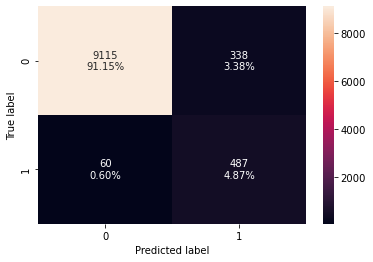

<IPython.core.display.Javascript object>

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(rf_un_tuned2, X_val, y_val)

* The tuned Undersampled Random Forest model is giving a generalized performance with a Recall value of 0.89.
* The Recall value is less when compared to the Tuned Xgboost models.

### Tuning Gradient Boosting Classifier using Oversampled data

In [51]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100,150,25), 
    "learning_rate": [0.2, 0.05, 1], 
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7] 
}

#Calling RandomizedSearchCV
gbc_over_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
gbc_over_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(gbc_over_tuned.best_params_,gbc_over_tuned.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9592736248236953:
Wall time: 23min 54s


<IPython.core.display.Javascript object>

In [52]:
# building model with best parameters
gbc_over_tuned2 = GradientBoostingClassifier(
    random_state=1, n_estimators=125, learning_rate=1, subsample=0.7, max_features=0.7,
)
# Fit the model on oversampled data
gbc_over_tuned2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [53]:
# Calculating different metrics on train set
gbc_over_tuned_train_perf = model_performance_classification_sklearn(
    gbc_over_tuned2, X_train_over, y_train_over
)
print("Training performance - Tuned GradientBoosting:")
gbc_over_tuned_train_perf

Training performance - Tuned GradientBoosting:


,Accuracy,Recall,Precision,F1
0,0.975,0.970,0.980,0.975


<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics on validation set
gbc_over_tuned_val_perf = model_performance_classification_sklearn(
    gbc_over_tuned2, X_val, y_val
)
print("Validation performance - Tuned GradientBoosting:")
gbc_over_tuned_val_perf

Validation performance - Tuned GradientBoosting:


,Accuracy,Recall,Precision,F1
0,0.961,0.876,0.596,0.709


<IPython.core.display.Javascript object>

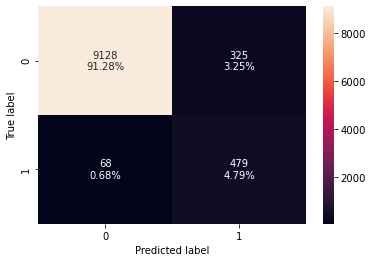

<IPython.core.display.Javascript object>

In [55]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_over_tuned2, X_val, y_val)

* The tuned Oversampled Gradient Boosting model is giving a generalized performance with a Recall value of 0.876.
* The Recall value is less when compared to the Tuned Xgboost models.

### Tuning Gradient Boosting Classifier using Undersampled data

In [56]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100,150,25), 
    "learning_rate": [0.2, 0.05, 1], 
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7] 
}

#Calling RandomizedSearchCV
gbc_un_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV on oversampled data
gbc_un_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbc_un_tuned.best_params_,gbc_un_tuned.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9018292682926831:
Wall time: 53.8 s


<IPython.core.display.Javascript object>

In [57]:
# building model with best parameters
gbc_un_tuned2 = GradientBoostingClassifier(
    random_state=1,
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.7,
)
# Fit the model on oversampled data
gbc_un_tuned2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [58]:
# Calculating different metrics on train set
gbc_un_tuned_train_perf = model_performance_classification_sklearn(
    gbc_un_tuned2, X_train_un, y_train_un
)
print("Training performance - Tuned GradientBoosting:")
gbc_un_tuned_train_perf

Training performance - Tuned GradientBoosting:


,Accuracy,Recall,Precision,F1
0,0.978,0.962,0.994,0.978


<IPython.core.display.Javascript object>

In [59]:
# Calculating different metrics on validation set
gbc_un_tuned_val_perf = model_performance_classification_sklearn(
    gbc_un_tuned2, X_val, y_val
)
print("Validation performance - Tuned GradientBoosting:")
gbc_un_tuned_val_perf

Validation performance - Tuned GradientBoosting:


,Accuracy,Recall,Precision,F1
0,0.942,0.896,0.485,0.629


<IPython.core.display.Javascript object>

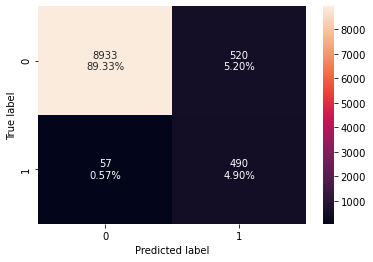

<IPython.core.display.Javascript object>

In [60]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_un_tuned2, X_val, y_val)

* The tuned Undersampled Gradient Boosting model is giving a generalized performance with a Recall value of 0.896.
* This Recall value is less when compared to the Tuned Xgboost models.

## Model performance comparison and choosing the final model

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_over_tuned_train_perf.T,
        xgb_tuned_train_perf.T,
        rf_tuned_train_perf.T,
        rf_un_tuned_train_perf.T,
        gbc_over_tuned_train_perf.T,
        gbc_un_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost_Tuned_Oversampled",
    "XGBoost_Tuned_Undersampled",
    "RandomForest_Tuned_Oversampled",
    "RandomForest_Tuned_Undersampled",
    "GradientBoosting_Tuned_Oversampled",
    "GradientBoosting_Tuned_Undersampled",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost_Tuned_Oversampled,XGBoost_Tuned_Undersampled,RandomForest_Tuned_Oversampled,RandomForest_Tuned_Undersampled,GradientBoosting_Tuned_Oversampled,GradientBoosting_Tuned_Undersampled
Accuracy,0.990,0.947,1.000,0.955,0.975,0.978
Recall,1.000,1.000,0.999,0.921,0.970,0.962
Precision,0.980,0.905,1.000,0.988,0.980,0.994
F1,0.990,0.950,1.000,0.954,0.975,0.978


<IPython.core.display.Javascript object>

In [62]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_over_tuned_val_perf.T,
        xgb_tuned_val_perf.T,
        rf_tuned_val_perf.T,
        rf_un_tuned_val_perf.T,
        gbc_over_tuned_val_perf.T,
        gbc_un_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost_Tuned_Oversampled",
    "XGBoost_Tuned_Undersampled",
    "RandomForest_Tuned_Oversampled",
    "RandomForest_Tuned_Undersampled",
    "GradientBoosting_Tuned_Oversampled",
    "GradientBoosting_Tuned_Undersampled",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost_Tuned_Oversampled,XGBoost_Tuned_Undersampled,RandomForest_Tuned_Oversampled,RandomForest_Tuned_Undersampled,GradientBoosting_Tuned_Oversampled,GradientBoosting_Tuned_Undersampled
Accuracy,0.965,0.811,0.990,0.960,0.961,0.942
Recall,0.901,0.929,0.872,0.890,0.876,0.896
Precision,0.626,0.216,0.948,0.590,0.596,0.485
F1,0.739,0.350,0.909,0.710,0.709,0.629


<IPython.core.display.Javascript object>

* Tuned Undersampled Xgboost model has the highest validation Recall value of 0.929. 
* Tuned Oversampled Xgboost model gives a similar performance with a Recall value of 0.901.
* Tuned Undersampled Xgboost model has very low value for precision and the accuracy also is less when compared to the Oversampled Xgboost model. A very low value of precision implies that the inspection cost of the generator will be more.
* Let's choose Tuned Oversampled Xgboost model which has a good Recall value and other metrics also have fairly good values.
* Now, we will use the Tuned Oversampled Xgboost model on the test data and check the feature importances.

### Test set final performance

In [63]:
# Calculating different metrics on the test set
xgboost_over_test = model_performance_classification_sklearn(
    xgb_over_tuned2, X_test, y_test
)
print("Test performance:")
xgboost_over_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.960,0.881,0.590,0.707


<IPython.core.display.Javascript object>

* Tuned Oversampled Xgboost model is giving a generalized performance on the test dataset.

### Feature Importances

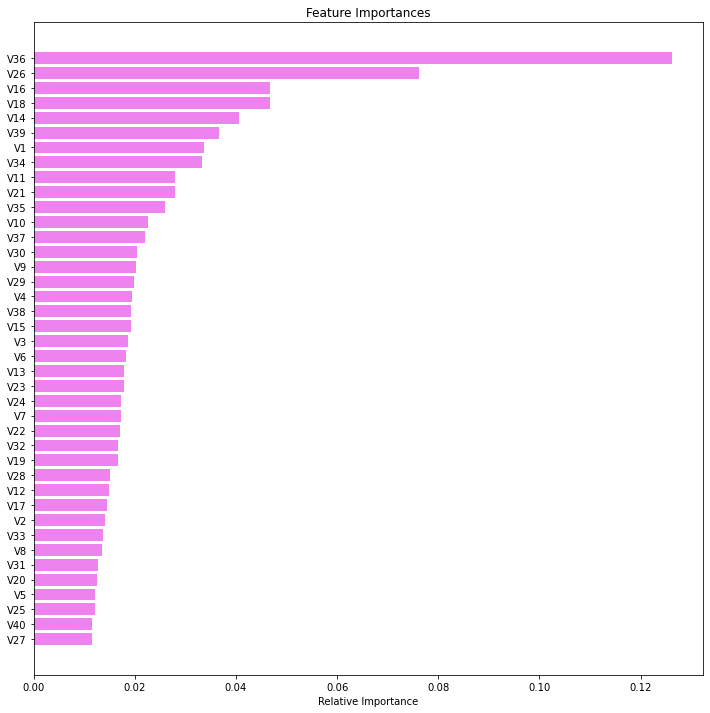

<IPython.core.display.Javascript object>

In [64]:
feature_names = X.columns
importances = xgb_over_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* V36 is the most important feature followed by V26 and V16.
* All the features are contributing to the prediction of the target variable.

## Pipelines to build the final model


In [65]:
# Creating new pipeline with the final model and best parameters
Model = Pipeline(
    [
        (
            "xgb_tuned",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                n_estimators=100,
                scale_pos_weight=10,
                learning_rate=0.2,
                gamma=3,
                subsample=0.9,
            ),
        )
    ]
)

<IPython.core.display.Javascript object>

In [66]:
# Separating target variable and other variables from train dataset
X1_train = data_train.drop("Target", axis=1)
y1_train = data_train["Target"]

# Separating target variable and other variables from test dataset
X1_test = data_test.drop("Target", axis=1)
y1_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [67]:
# Imputing missing values before oversampling the train data
imputer1 = SimpleImputer(strategy="median")
X1_train = imputer1.fit_transform(X1_train)
X1_test = imputer1.transform(X1_test)

# Oversampling train data
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X1_train_over, y1_train_over = sm.fit_resample(X1_train, y1_train)

<IPython.core.display.Javascript object>

In [68]:
# Fit the model on oversampled training data
Model.fit(X1_train_over, y1_train_over)

Pipeline(steps=[('xgb_tuned',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=3, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [69]:
# transforming and predicting on test data
Model.predict(X1_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

* The most important feature affecting the failure of the generator is V36. The lower the value of V36, the more the chance of failure of the generator.
* The top 5 features impacting the failure of the generator are V36, V26, V16, V18 and V14.
* The average value of these features <V3, V5, V10, V13, V18, V22, V24, V26, V31, V32, V35, V36, V39> are low during failure than during no failure. The company may avoid the failure of the generator by making sure the value of these features are not too low.
* The average value of these features <V1, V4, V7, V8, V11, V14, V15, V16, V17, V19, V20, V21, V28, V29, V34> are more during failure than during no failure. The company may avoid the failure of the generator by making sure the value of these features are not too high.

***